In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
import sys
import matplotlib.pyplot as plt 
np.set_printoptions(threshold=sys.maxsize)

In [2]:
csv1 = pd.read_csv('sequence_execution_time.csv')
#csv1.head()

In [3]:
csv1.tail()

,sequence_identifier,read_sequence,quality,execution_time
3999995,@HWI-D00360:5:H814YADXX:1:1115:18756:14266 1:N...,ACTAATAAAGAAAAAAAGAGAGAAGAATCAAATAGACGCAATAAAA...,C@CFFFFFHHHHHJGEHHIJJJIJIIJJJJJIJJIFIIIIGIJJIJ...,341.792
3999996,@HWI-D00360:5:H814YADXX:1:1115:18805:14266 1:N...,ATAAATGAATAATAGGCGGTTTCTGACATCAGGAAGTTTAGACCGC...,CCCFFFFFGHHHHJJJJJJGIJHIJGIIJJIJJIIJHIJJIIJJJJ...,556.625
3999997,@HWI-D00360:5:H814YADXX:1:1115:18868:14278 1:N...,GTATGGAAATACCTGGATGTCCAGGCAGAAGTGTGCTACAGGGGCA...,@@CFFFFFHGHHHJIIIGIGHHAGGGIIBGG?ECCFFHIJJGEBDA...,8523.708
3999998,@HWI-D00360:5:H814YADXX:1:1115:18797:14322 1:N...,AACTCAGTAATTACTTTGATTTGGAGTCTTAATGCAATTTTACCCA...,CCCFFFFFHDHHHJJJJJJIJJJIJIHGHIIJJJJIJIJJJJJJJI...,880.708
3999999,@HWI-D00360:5:H814YADXX:1:1115:18971:14400 1:N...,GAAAATAGTTTCCCATTTGTTGCCACTGTTTTAAACTTACTGTTAT...,@@@FDFDBBDFFBFIGGGCFGFHHGIGEHIIIIEIIGE@GIIIGGI...,624.208


In [4]:
#data = csv1.drop(['sequence_identifier','quality'], axis = 1)
data = csv1

In [5]:
data1 = data.drop(csv1.index[500:]) #Took 4.5 hours to train dataset of 5,000 samples
#data.head()

In [6]:
data1.tail()

,sequence_identifier,read_sequence,quality,execution_time
495,@HWI-D00360:5:H814YADXX:1:1101:4753:2342 1:N:0...,AATTTACCTTGCCCAGATCCATCAGAGGAATCACTGTCTATGGCAG...,??@FFFFFHH?DFHHGHGHEEGHGGBHGAHGIBGE?C@CDFHHE9B...,5604.917
496,@HWI-D00360:5:H814YADXX:1:1101:4779:2350 1:N:0...,GCATGGAAAGCATTAGCCACTTGAATTCAAGGAAGAGCATTCTTGG...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ...,555.708
497,@HWI-D00360:5:H814YADXX:1:1101:4845:2365 1:N:0...,TTGCTTGAATCCGGGAGATGGAGGTTTGCAGTGAGCTGAAATCATG...,@@@DDDBDHBBDDD:G?GDEEGGH8BCHEGH?FDDFCHGGGEHHAG...,8450.375
498,@HWI-D00360:5:H814YADXX:1:1101:4891:2378 1:N:0...,GGCATTCTAAGTCACCCCCACAGCCCTCTAATGCCAGTCCAGCTGC...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJIIJJJIJJJJJJJJ...,670.417
499,@HWI-D00360:5:H814YADXX:1:1101:4940:2382 1:N:0...,AATAAAGTAAATTGAGTGGTAACTTTACAAAGACTTCAAAGTCAGC...,CCCFFFFDHHHHHJJJGIJIIJJJJJJJJJJJJJJJJJJJJIJJJJ...,555.750


In [7]:
reads = data1.drop(['sequence_identifier','quality'], axis =1)
reads

,read_sequence,execution_time
0,CTGGTCCTAACATCTGTTGACCATAGCCATATTTTTCAGAAAAGTC...,2295.125
1,TGGCTATGGGCTGCAATAATTCGTCTTTCTGAAAGGGCATTCAGCC...,674.000
2,ACTTTCTATCTCTATGGATTTAACCATTGTGGATATTTCATGTAAA...,757.209
3,ATCAAAAACATTCAAATGAAATCATCTTAAGTGCCAGAATTATAAA...,397.042
4,CAGGTTCCAATATTACAAATGCAAGGCCAGAAGGAGACTGCAAATG...,675.000
...,...,...
495,AATTTACCTTGCCCAGATCCATCAGAGGAATCACTGTCTATGGCAG...,5604.917
496,GCATGGAAAGCATTAGCCACTTGAATTCAAGGAAGAGCATTCTTGG...,555.708
497,TTGCTTGAATCCGGGAGATGGAGGTTTGCAGTGAGCTGAAATCATG...,8450.375
498,GGCATTCTAAGTCACCCCCACAGCCCTCTAATGCCAGTCCAGCTGC...,670.417


In [8]:
reads['execution_time'] = np.log10(reads.execution_time)
reads

,read_sequence,execution_time
0,CTGGTCCTAACATCTGTTGACCATAGCCATATTTTTCAGAAAAGTC...,3.360806
1,TGGCTATGGGCTGCAATAATTCGTCTTTCTGAAAGGGCATTCAGCC...,2.828660
2,ACTTTCTATCTCTATGGATTTAACCATTGTGGATATTTCATGTAAA...,2.879216
3,ATCAAAAACATTCAAATGAAATCATCTTAAGTGCCAGAATTATAAA...,2.598836
4,CAGGTTCCAATATTACAAATGCAAGGCCAGAAGGAGACTGCAAATG...,2.829304
...,...,...
495,AATTTACCTTGCCCAGATCCATCAGAGGAATCACTGTCTATGGCAG...,3.748569
496,GCATGGAAAGCATTAGCCACTTGAATTCAAGGAAGAGCATTCTTGG...,2.744847
497,TTGCTTGAATCCGGGAGATGGAGGTTTGCAGTGAGCTGAAATCATG...,3.926876
498,GGCATTCTAAGTCACCCCCACAGCCCTCTAATGCCAGTCCAGCTGC...,2.826345


In [9]:
def Kmers_funct(seq, size=9): #148 characters/sequence  size = 6 better? Used 4 previously.[SIze = 9 gave a r_sq = 1 is this the best value for data = 250, train = 0.8 random = 42, ngaram 4,4]??
    #Performed much better with same settings and more data. used 1000. r_sq reduced to 0.9999999999999962
   return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]
#convert our training data sequences into short overlapping k-mers of length 6. Lets do that for each species of data we have using our Kmers_funct function.
reads['words'] = reads.apply(lambda x: Kmers_funct(x['read_sequence']), axis=1)
reads = reads.drop('read_sequence', axis=1)

In [10]:
human_texts = list(reads['words'])
for item in range(len(human_texts)):
   human_texts[item] = ' '.join(human_texts[item])
#separate labels
Y = reads.iloc[:, 0].values # y_human for human_dna

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (4,4)) # initially (4,4) 
#: For ngram_range = (1,4) and fitting with all data rmsle = 0.3123797747684005, mse = 781905.5443143004, size = 9, data = 500, testsize = 0.8,random_state = 42
#: For ngram_range = (4,4) and fitting with all data rmsle = 0.27364484069740186, mse = 1041022.6402906085, size = 9, data = 500, testsize = 0.8,random_state = 42
X = cv.fit_transform(human_texts)
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfid = TfidfVectorizer(ngram_range = (4,4))
#X = tfid.fit_transform(human_texts)
#print(X)

In [12]:
#from sklearn.preprocessing import MaxAbsScaler
#abs_scal = MaxAbsScaler()

#XX = abs_scal.fit_transform(X)

In [13]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 1) #Try different random_state number, n_jobs = -1 to speed up(use all processors)
#regressor.fit(X,Y)

In [14]:
#pd.DataFrame({'Variable':X.columns,
#              'Importance':regressor.feature_importances_}).sort_values('Importance', ascending=False)

In [15]:
#score = regressor.score(X,Y)
#score

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42) 
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (400, 65749)
X_test (100, 65749)
y_train (400,)
y_test (100,)


In [17]:
#regressor = RandomForestRegressor( random_state = 1)
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [18]:
r2_score_train = regressor.score(X_train,y_train)  
r2_score_train

0.8713928122241194

In [19]:
r2_score_test = regressor.score(X_test,y_test)  
r2_score_test

-0.10177739710013367

In [20]:
ypred = regressor.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error
ypred_train = regressor.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, ypred_train))     
rmse_train

0.14958862828752353

In [22]:

ypred = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, ypred))           
rmse

0.44363533994270055

In [23]:
from sklearn.metrics import mean_squared_log_error
rmsle = mean_squared_log_error(y_test,ypred)**0.5             
rmsle

0.10515317841744265

In [24]:
y_pred_non_log = 10**(ypred)
y_test_non_log = 10**(y_test)

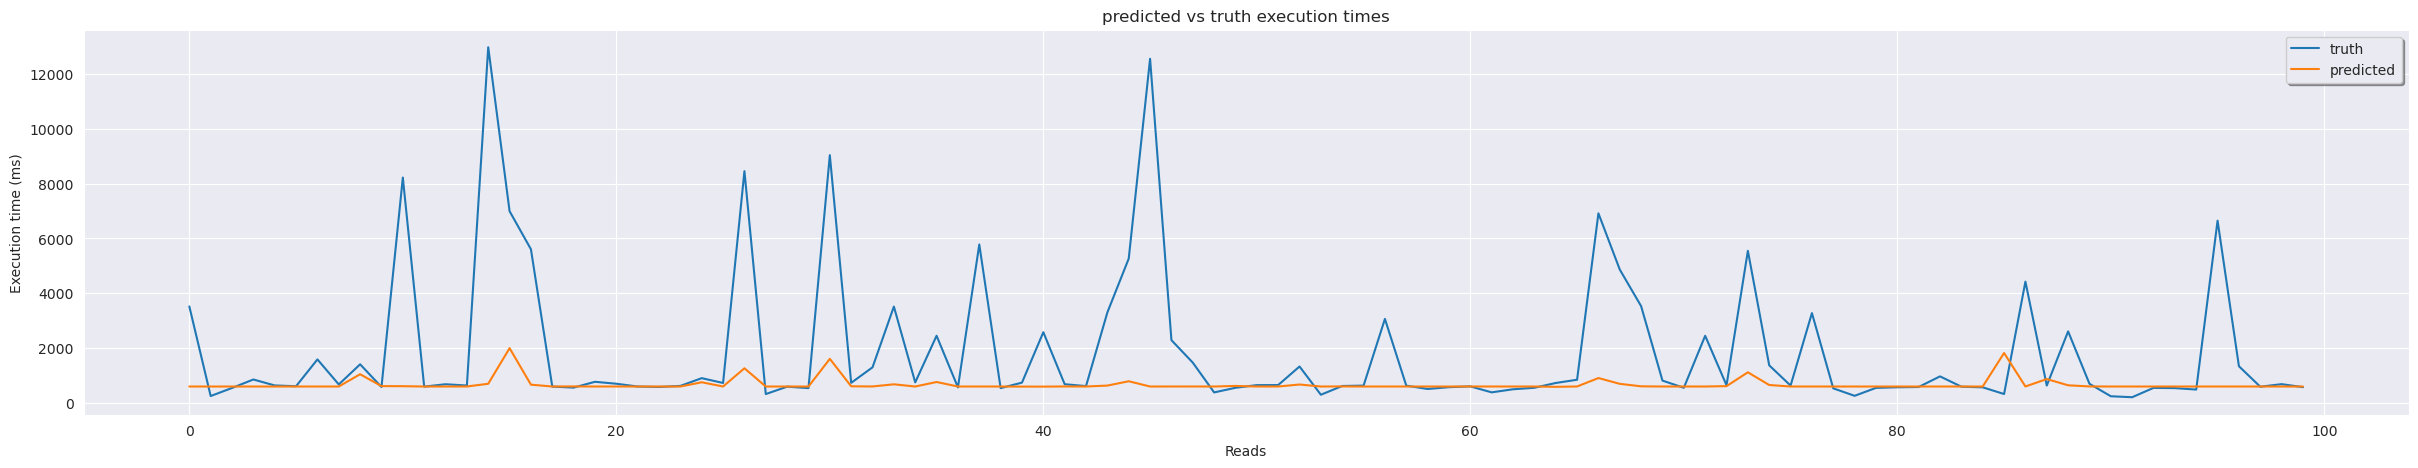

In [25]:
x_ax = range(len(y_test_non_log))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x_ax, y_test_non_log, label="truth")
plt.plot(x_ax, y_pred_non_log, label="predicted")
plt.title("predicted vs truth execution times")
plt.xlabel('Reads')
plt.ylabel('Execution time (ms)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()